In [39]:
import numpy as np
import pandas as pd
from numpy import load
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [2]:
X_train = load("../data/dataset/npz_data/X_train.npz")["arr_0"]
y_train = load("../data/dataset/npz_data/y_train.npz")["arr_0"]
X_test = load("../data/dataset/npz_data/X_test.npz")["arr_0"]
y_test = load("../data/dataset/npz_data/y_test.npz")["arr_0"]
print("The X_train shape is: ", X_train.shape)
print("The y_train shape is: ", y_train.shape)
print("The X_test shape is: ", X_test.shape)
print("The y_test shape is: ", y_test.shape)

The X_train shape is:  (16906, 96, 96)
The y_train shape is:  (16906,)
The X_test shape is:  (11269, 96, 96)
The y_test shape is:  (11269,)


In [3]:
print("Reshaing our img data")
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2] , 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255
X_test = X_test / 255

Reshaing our img data


In [4]:
num_classes = pd.read_csv("../data/dataset/emotion_count.csv").shape[0]
label_enc = LabelEncoder()

y_train_num = label_enc.fit_transform(y_train)
y_test_num = label_enc.fit_transform(y_test)

y_train = to_categorical(y_train_num, num_classes)
y_test = to_categorical(y_test_num, num_classes)

print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print("The X_train shape is: ", X_train.shape)
print("The y_train shape is: ", y_train.shape)
print("The X_test shape is: ", X_test.shape)
print("The y_test shape is: ", y_test.shape)


The X_train shape is:  (16906, 96, 96, 1)
The y_train shape is:  (16906, 8)
The X_test shape is:  (11269, 96, 96, 1)
The y_test shape is:  (11269, 8)


## Building the Model

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │     1,083,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,102,216 (4.20 MB)

 Trainable params: 1,102,216 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.2175 - loss: 2.2124 - val_accuracy: 0.2816 - val_loss: 2.3077
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 988ms/step - accuracy: 0.4832 - loss: 1.4067 - val_accuracy: 0.3424 - val_loss: 2.3937
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 978ms/step - accuracy: 0.6010 - loss: 1.1295 - val_accuracy: 0.3796 - val_loss: 2.3347
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7067 - loss: 0.8643 - val_accuracy: 0.3660 - val_loss: 2.3501
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7847 - loss: 0.6480 - val_accuracy: 0.3872 - val_loss: 2.7313
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8742 - loss: 0.4208 - val_accuracy: 0.3831 - val_loss: 2.8991
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9286 - loss: 0.2701 - val_accuracy: 0.3802 - val_loss: 3.3579
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 972ms/step - accuracy: 0.9699 - loss: 0.1606 - val_accuracy: 0.3639 - 

In [17]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
print("Loss" , loss1)
print("Accuracy" , accuracy1)

353/353 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.3538 - loss: 4.5002
Loss 4.685215473175049
Accuracy 0.3768746256828308


Model seems to be overfitting, therefore let's try adding dropouts

In [24]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(8, activation='softmax'))

c:\Users\Vishal\Desktop\Work Drive\Github Projects\Moodity\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │       495,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 588,296 (2.24 MB)

 Trainable params: 588,296 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1922 - loss: 2.0342 - val_accuracy: 0.2645 - val_loss: 2.2085
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4573 - loss: 1.4897 - val_accuracy: 0.3132 - val_loss: 2.1667
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5293 - loss: 1.2967 - val_accuracy: 0.3776 - val_loss: 2.2038
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5930 - loss: 1.1252 - val_accuracy: 0.3940 - val_loss: 2.1393
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6390 - loss: 0.9915 - val_accuracy: 0.3930 - val_loss: 2.0165
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6826 - loss: 0.8877 - val_accuracy: 0.4096 - val_loss: 2.1293
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7220 - loss: 0.7788 - val_accuracy: 0.4141 - val_loss: 2.2798
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7565 - loss: 0.6866 - val_accuracy: 0.4039 - v

In [28]:
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print("Accuracy" , accuracy2 * 100)
print("Loss" , loss2)

353/353 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3545 - loss: 2.7018
Accuracy 40.811073780059814
Loss 2.6325161457061768


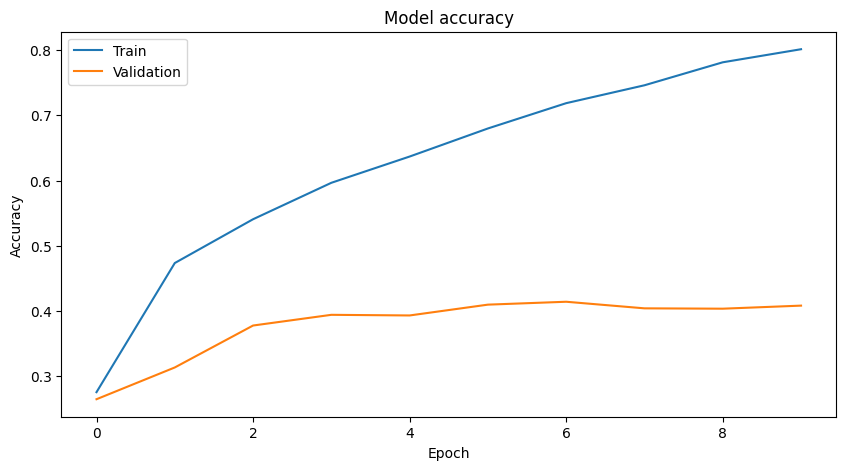

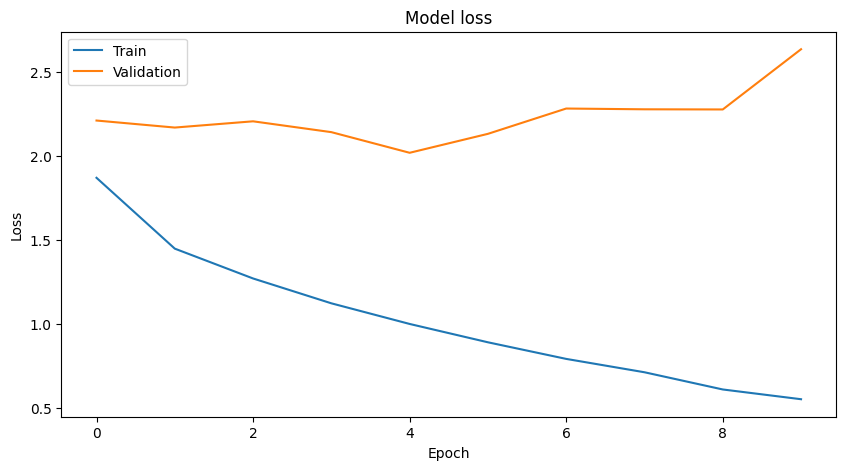

In [32]:
plt.figure(figsize=(7, 3))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [35]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(8, activation='softmax'))

In [30]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 44, 44, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,519,368 (13.43 MB)

 Trainable params: 3,519,368 (13.43 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.1566 - loss: 2.0864 - val_accuracy: 0.2455 - val_loss: 2.2721
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3493 - loss: 1.7003 - val_accuracy: 0.3046 - val_loss: 2.3522
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4328 - loss: 1.5017 - val_accuracy: 0.3121 - val_loss: 2.3103
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.4699 - loss: 1.4187 - val_accuracy: 0.3432 - val_loss: 2.3658
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4976 - loss: 1.3469 - val_accuracy: 0.3368 - val_loss: 2.2699
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5124 - loss: 1.3047 - val_accuracy: 0.3550 - val_loss: 2.4995
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5385 - loss: 1.2360 - val_accuracy: 0.3704 - val_loss: 2.2537
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.5495 - loss: 1.2053 - val_accuracy: 0.3852 - v

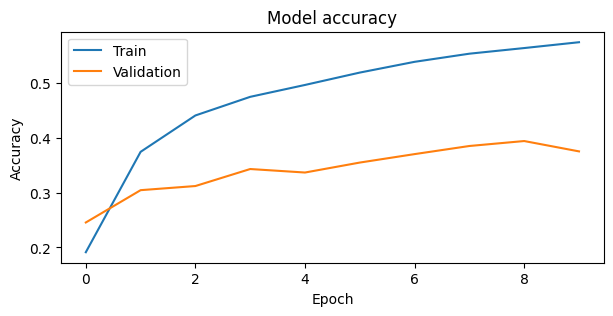

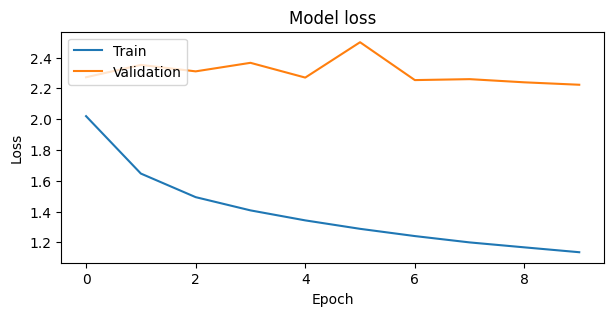

In [40]:
plt.figure(figsize=(7, 3))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5887 - loss: 1.1077 - val_accuracy: 0.3960 - val_loss: 2.0852
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.5952 - loss: 1.0874 - val_accuracy: 0.4072 - val_loss: 2.1625
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6005 - loss: 1.0652 - val_accuracy: 0.4259 - val_loss: 2.1542
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6216 - loss: 1.0339 - val_accuracy: 0.4239 - val_loss: 2.1815
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6199 - loss: 1.0151 - val_accuracy: 0.4107 - val_loss: 2.1089
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.6240 - loss: 1.0178 - val_accuracy: 0.4168 - val_loss: 2.0974
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.6349 - loss: 0.9800 - val_accuracy: 0.4305 - val_loss: 2.2366
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.6544 - loss: 0.9395 - val_accuracy: 0.4322 - v

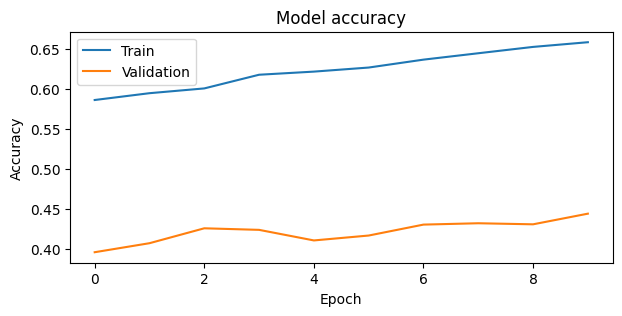

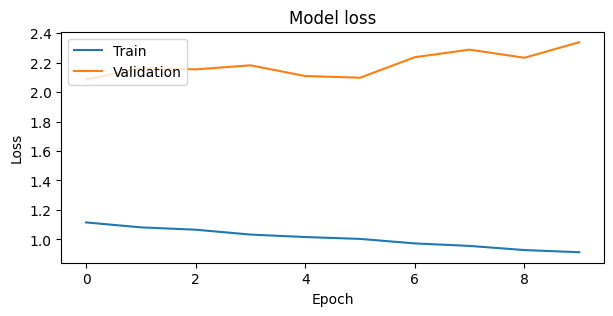

In [42]:
plt.figure(figsize=(7, 3))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model4.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(8, activation='softmax'))

In [47]:
model4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 44, 44, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,666,312 (13.99 MB)

 Trainable params: 3,666,056 (13.98 MB)

 Non-trainable params: 256 (1.00 KB)

In [48]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=150)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.2994 - loss: 1.8599 - val_accuracy: 0.1661 - val_loss: 2.0256
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.5006 - loss: 1.3439 - val_accuracy: 0.3782 - val_loss: 1.8560
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.5600 - loss: 1.1868 - val_accuracy: 0.4193 - val_loss: 1.6811
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.6153 - loss: 1.0656 - val_accuracy: 0.4324 - val_loss: 1.6053
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.6491 - loss: 0.9762 - val_accuracy: 0.4289 - val_loss: 1.5952
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.6773 - loss: 0.9004 - val_accuracy: 0.4345 - val_loss: 1.9286
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.6989 - loss: 0.8247 - val_accuracy: 0.4658 - val_loss: 1.8000
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7117 - loss: 0.7846 - val_accu

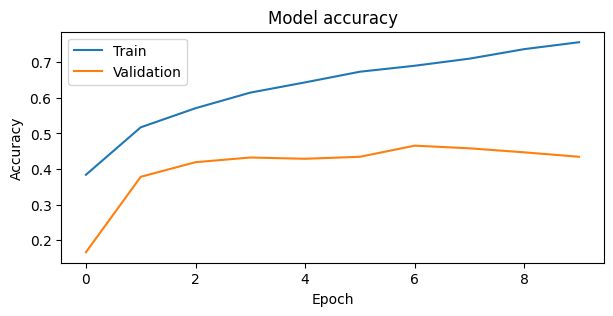

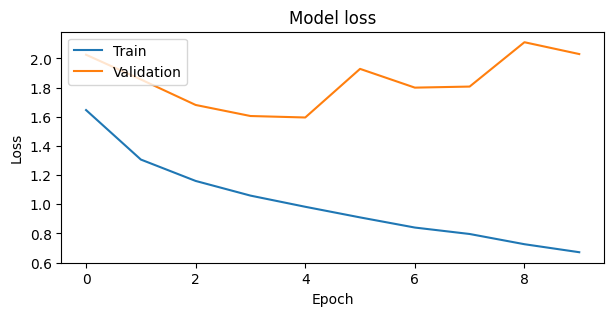

In [53]:
plt.figure(figsize=(7, 3))
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
model5 = Sequential()

model5.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Flatten())

model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(8, activation='softmax'))

c:\Users\Vishal\Desktop\Work Drive\Github Projects\Moodity\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [55]:
model5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,406,088 (12.99 MB)

 Trainable params: 3,404,872 (12.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [58]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=150)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 105s 928ms/step - accuracy: 0.6987 - loss: 0.8199 - val_accuracy: 0.4262 - val_loss: 2.2088
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 104s 920ms/step - accuracy: 0.7294 - loss: 0.7506 - val_accuracy: 0.4465 - val_loss: 2.0502
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 101s 898ms/step - accuracy: 0.7375 - loss: 0.7234 - val_accuracy: 0.4602 - val_loss: 2.3367
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 102s 904ms/step - accuracy: 0.7615 - loss: 0.6654 - val_accuracy: 0.4398 - val_loss: 2.1887
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 104s 920ms/step - accuracy: 0.7685 - loss: 0.6311 - val_accuracy: 0.4386 - val_loss: 2.1860
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 103s 912ms/step - accuracy: 0.7900 - loss: 0.5819 - val_accuracy: 0.4500 - val_loss: 2.4442
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 102s 902ms/step - accuracy: 0.7992 - loss: 0.5591 - val_accuracy: 0.4470 - val_loss: 2.3753
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 103s 908ms/step - accuracy: 0.8067 -

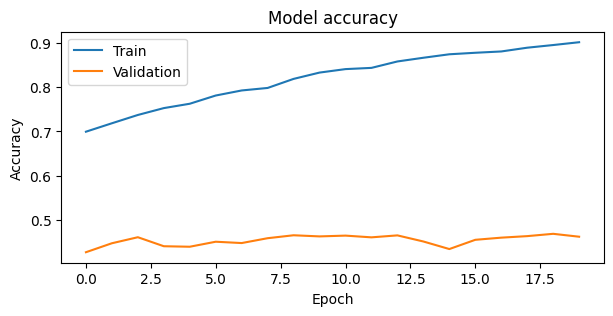

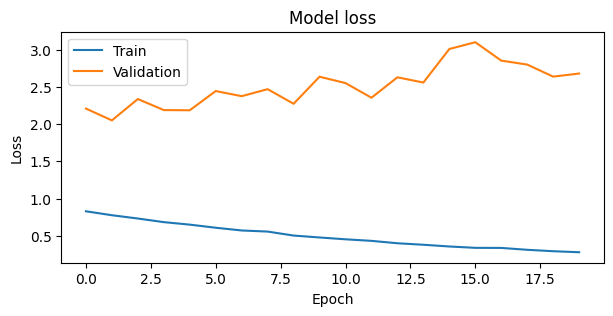

In [64]:
plt.figure(figsize=(7, 3))
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:
model6 = Sequential()

model6.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.4))

model6.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.5))

model6.add(Flatten())

model6.add(Dense(256, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(8, activation='softmax'))

c:\Users\Vishal\Desktop\Work Drive\Github Projects\Moodity\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [67]:
model6.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 92, 92, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 42, 42, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,473,256 (5.62 MB)

 Trainable params: 1,470,632 (5.61 MB)

 Non-trainable params: 2,624 (10.25 KB)

In [68]:
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.1738 - loss: 2.8138 - val_accuracy: 0.1637 - val_loss: 2.2838
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.2823 - loss: 1.9395 - val_accuracy: 0.0595 - val_loss: 2.2680
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.3599 - loss: 1.6911 - val_accuracy: 0.2348 - val_loss: 2.3769
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4269 - loss: 1.5046 - val_accuracy: 0.2795 - val_loss: 2.2960
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.4638 - loss: 1.3939 - val_accuracy: 0.2910 - val_loss: 2.2945
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4381 - loss: 1.4733 - val_accuracy: 0.3295 - val_loss: 2.1058
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4998 - loss: 1.3168 - val_accuracy: 0.3258 - val_loss: 2.3524
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5423 - loss: 1.2006 - val_accu

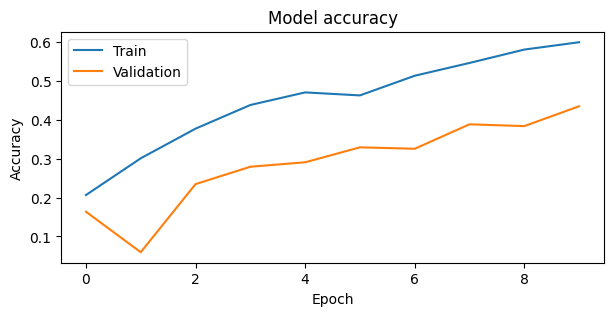

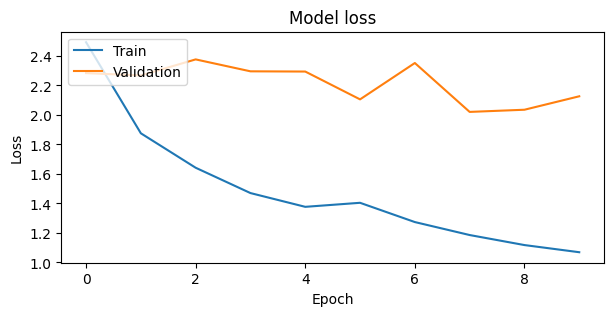

In [70]:
plt.figure(figsize=(7, 3))
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7, 3))
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model6 = Sequential()

model6.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.4))

model6.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.5))

model6.add(Flatten())

model6.add(Dense(128, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))


model6.add(Dense(8, activation='softmax'))